[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/computationalpharmaceutics/3FG005/blob/main/Lab01_peptide_aggregation/LAB_01_peptide_agregation_CPU.ipynb)

# Peptide aggregation simulation

This exercise demonstrates the use of all-atom molecular dynamics simulations with GROMACS for analyzing peptide aggregation

Throughout the exercise, there are questions that you should answer for the report. This has no set page limit but 1-3 pages might be appropriate. After you have finished, please submit your report to Studium.

# Important:

Before start with this lab click in the edit menu and select clear all outputs

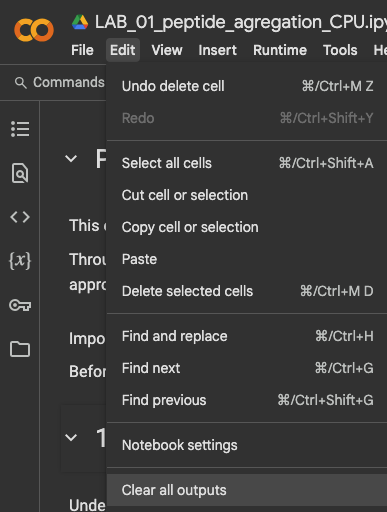

# 1. Introduction

Understanding of peptide aggregation propensity is an important aspect in pharmaceutical development of peptide drugs. In this exercise, methodologies based on all-atom molecular dynamics (AA-MD) simulations and 1 H-NMR (which was run in neat H2 O) will be evaluated as tools for identification and investigation of peptide aggregation. A series of structurally similar, pharmaceutically relevant peptides with known differences in aggregation behavior (D‑Phe6 ‑GnRH, ozarelix and cetrorelix) will be investigated.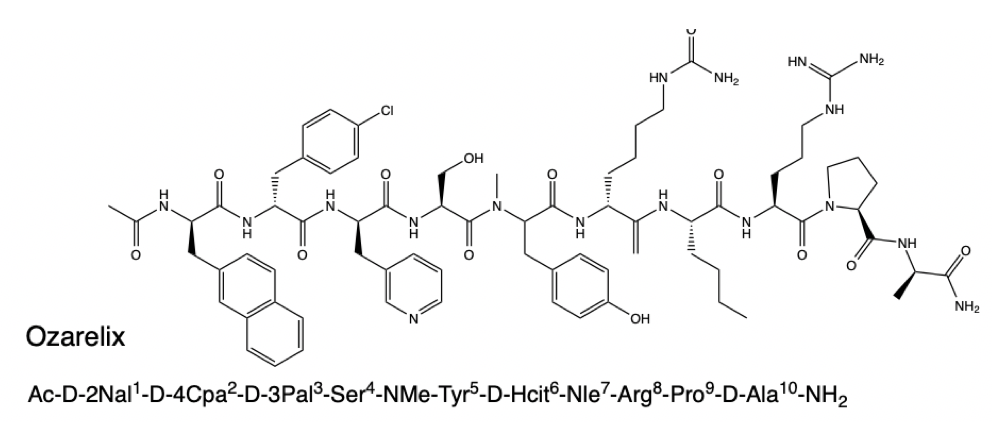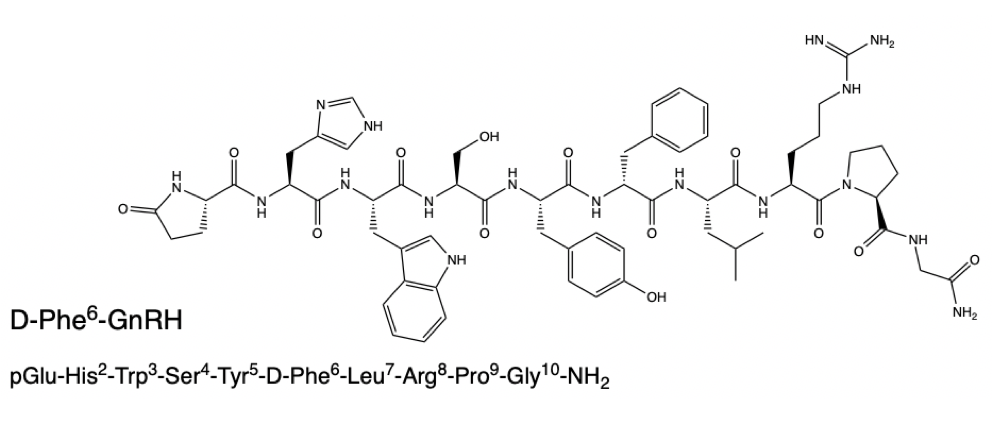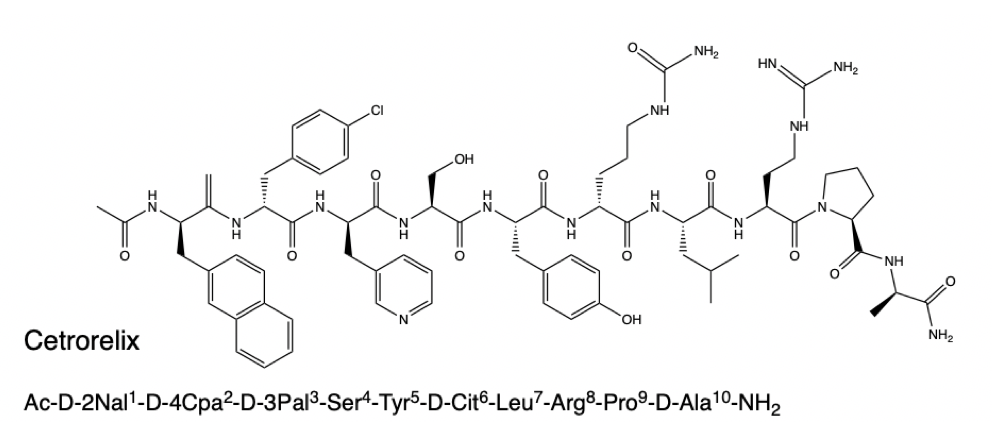

# 2. Background

The aggregation behaviour of therapeutic peptides influences several critical aspects of pharmaceutical development, such as the dosage forms possible to develop, ease of manufacturing, formulation stability, and patient safety and convenience. Self-assembly is often an unwanted effect, but can also be utilized to alter the pharmacokinetics of peptide and protein drugs and can improve the chemical and physical stability of the drug. When peptides self-assemble, they can, similarly to proteins, form various types of aggregates. The two aggregate types most commonly discussed for therapeutic peptides are:

-  1) amyloid-like fibrils, where the peptide chains are folded into stacked beta-sheets
-  2) amorphous aggregates, i.e. disordered structures.

Amyloid-like fibrils are known to be preceded by smaller aggregates, e.g. oligomers or fibril fragments (proto-fibrils or filaments) and some peptides can form stable, well-defined oligomers. It is likely that transient oligomers, which may involve just a few molecules, play a role in the formation of larger aggregates (for short-lived oligomers, it can be debated what should be regarded as aggregates or simply attractive peptide-peptide interactions in solution). Transient oligomers may be particularly relevant for small peptides, which often show high conformational flexibility and a notably amphiphilic character.

To obtain a good understanding of the aggregation behavior of a peptide, methods that can distinguish aggregates of different character and size are of importance.

# 3. Setting up the computing environment

In [1]:
# Installing necessary packages
!pip install py3Dmol

In [ ]:
# Cloning the course repository
!git clone https://github.com/computationalpharmaceutics/3FG005.git

Cloning into 'computational_pharmaceutics'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 89 (delta 25), reused 66 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (89/89), 25.38 MiB | 18.01 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [4]:
# Installing GROMACS with CPU support only
!apt install gromacs &> /dev/null

In [5]:
# Confirm it's installed
!gmx -version

                 :-) GROMACS - gmx, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teem

In [6]:
# Seting the path to GROMACS
import os
os.environ["PATH"] += ":/usr/local/gromacs/bin"

# Looking for the working directory
!pwd

/content


In [ ]:
# Changing the working directory to

import os
os.chdir('/content/computationalpharmaceutics/3FG005/Lab01_peptide_agregation/GROMACS_CPU/Cetrorelix')
!pwd

/content/computational_pharmaceutics/LAB_01_peptide_agregation/GROMACS_CPU/Cetrorelix


# 4 Assembling the system

The first step in most molecular simulations is assembling an initial system configuration (coordinates) as well as topologies (force field interaction parameters) for all molecules in the system. Depending on the molecules, either the initial coordinates, the topology or both can require a substantial amount of work as well as in-depth knowledge.

For this exercise you will be working with topologies that have been prepared in advance, and will only be required to update certain parts in the provided files.

We will however do the work to obtain the initial system configuration, and for this will be using built-in gromacs tools.

In [8]:
# Looking at the initial files :
!ls

cetrorelix_simulation.top	charmm36-nov2018.ff  em.mdp  npt.mdp  posre.itp
cetrorelix_single_molecule.gro	CL.gro		     md.mdp  nvt.mdp


In [9]:
# Visualizing the contents of the cetrorelix_single_molecule.gro file
with open('cetrorelix_single_molecule.gro', 'r') as file:
    for i in range(100):
        print(file.readline(), end='')

Protein in water
  195
    1ACE    CH3    1   4.801   5.210   3.529  0.7980 -0.5483 -0.4393
    1ACE   HH31    2   4.772   5.299   3.590  1.3961  0.4147 -1.5142
    1ACE   HH32    3   4.785   5.117   3.588  0.7749  0.4215  1.1350
    1ACE   HH33    4   4.907   5.235   3.506  0.1531  2.8460 -0.3071
    1ACE      C    5   4.716   5.191   3.413  0.0867 -0.2731  0.0841
    1ACE      O    6   4.601   5.145   3.432  0.5841 -0.3195  0.4438
    2DNAL     N    7   4.769   5.223   3.295 -0.0937 -0.3962  0.8041
    2DNAL    HN    8   4.862   5.261   3.296 -0.1447 -0.2476  2.4099
    2DNAL    CA    9   4.714   5.217   3.158 -0.7391  0.4611 -0.3061
    2DNAL    HA   10   4.741   5.121   3.116 -1.2516  0.6478 -1.0977
    2DNAL    CB   11   4.794   5.322   3.076 -0.1321 -0.2046 -0.2464
    2DNAL   HB1   12   4.904   5.303   3.076  0.5655  3.0881  1.1527
    2DNAL   HB2   13   4.787   5.416   3.135 -2.1672 -0.9809  0.8255
    2DNAL    CG   14   4.757   5.333   2.932 -0.5149  0.3061  0.4405
    2DNAL  

In [10]:
# Transforming the cetrorelix_single_molecule.gro to a cetrorelix_single_molecule.pbd file
!gmx editconf -f cetrorelix_single_molecule.gro -o cetrorelix_single_molecule.pdb

             :-) GROMACS - gmx editconf, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff           

In [11]:
# Looking at the generated files
!ls

cetrorelix_simulation.top	cetrorelix_single_molecule.pdb	CL.gro	md.mdp	 nvt.mdp
cetrorelix_single_molecule.gro	charmm36-nov2018.ff		em.mdp	npt.mdp  posre.itp


In [12]:
# Visualizing the cetrorelix_single_molecule.pdb
import py3Dmol
with open('cetrorelix_single_molecule.pdb', 'r') as f:
    pdb_data = f.read()

view = py3Dmol.view(width=600, height=400)
view.addModel(pdb_data, 'pdb')
view.setStyle({'sphere': {'color': 'spectrum'}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Gromacs has a lot of built-in tools for both construction of different systems as well as tools for post-processing and analysis of trajectories. Here will be using the insert-molecules feature to create a simulation box and insert 6 copies of the peptide into it:


***!gmx insert-molecules -ci cetrorelix_single_molecule.gro -box 10 10 10 -nmol 6 -o system.gro***


This command will generate a file named as 'system.gro' which has a simulation box with a size of 10 nm in the x-, y- and z- direction and contains 6 Cetrorelix molecules in the box. This 6 molecules will represent approximately 10 mM concentration of peptides in the box.

In [13]:
# Creating a box
!gmx insert-molecules -ci cetrorelix_single_molecule.gro -box 10 10 10 -nmol 6 -o system.gro

         :-) GROMACS - gmx insert-molecules, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff       

In [14]:
# Looking the generated files
!ls

cetrorelix_simulation.top	charmm36-nov2018.ff  md.mdp   posre.itp
cetrorelix_single_molecule.gro	CL.gro		     npt.mdp  system.gro
cetrorelix_single_molecule.pdb	em.mdp		     nvt.mdp


In [15]:
# Convert the system.gro file to system.pdb for visualization purposes
!gmx editconf -f system.gro -o system.pdb

             :-) GROMACS - gmx editconf, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff           

In [16]:
# Looking the generated files
!ls

cetrorelix_simulation.top	charmm36-nov2018.ff  md.mdp   posre.itp
cetrorelix_single_molecule.gro	CL.gro		     npt.mdp  system.gro
cetrorelix_single_molecule.pdb	em.mdp		     nvt.mdp  system.pdb


In [17]:
# Visualizing the system

# Load the converted PDB file
pdb_data = open('system.pdb','r').read()

view = py3Dmol.view(width=800, height=500)
view.addModel(pdb_data, 'pdb')
view.setStyle({'sphere': {'color': 'spectrum'}})
view.addUnitCell()
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [18]:
# looking at the cetrorelix_simulation.top file
with open('cetrorelix_simulation.top', 'r') as file:
    for i in range(100):
        print(file.readline(), end='')

;
;	File 'topol.top' was generated
;	By user: mastersproject (504)
;	On host: farmaci078.farmaci.uu.se
;	At date: Fri Apr 26 14:24:07 2019

;
;	This is a standalone topology file
;
;	Created by:
;	                     :-) GROMACS - gmx pdb2gmx, 2016 (-:
;	
;	Executable:   /usr/local/gmx2016/bin/gmx
;	Data prefix:  /usr/local/gmx2016
;	Working dir:  /Users/mastersproject/All-atom/cetrorelix
;	Command line:
;	  gmx pdb2gmx -f cetrorelix.pdb -o cetrorelix_new.gro -ignh -water tip3p -ter
;	Force field was read from current directory or a relative path - path added.
;

; Include forcefield parameters
#include "./charmm36-nov2018.ff/forcefield.itp"

[ moleculetype ]
; Name            nrexcl
Protein             3

[ atoms ]
;   nr       type  resnr residue  atom   cgnr     charge       mass  typeB    chargeB      massB
; residue   1 ACE rtp ACE  q  0.0
     1        CT3      1    ACE    CH3      1      -0.27     12.011   ; qtot -0.27
     2        HA3      1    ACE   HH31      1       0.09   

We then also need to solvate the system using water as solvent using the solvate command:

***!gmx solvate -cp system.gro -cs spc216.gro -o system_solv.gro -p cetrorelix_simulation.top***

This will generate a new gro file named as 'system_solv.gro' which will add water in the simulation. This command will also make changes in the 'cetrorelix_simulation.top' file. After the line where the number of proteins were mentioned, there will be another line starting with 'SOL' followed by the number of water molecules that were added in the system.

- gmx solvate calls the GROMACs module 'solvate' to add a solvent to the simulation box.
- -cp system.gro is the input file.
- -cs spc216.gro is the water molecule model that will be used as a solvent.
- -o system_solv.gro is output file.
- -p cetrorelix_simulation.top is topology file that will be updated to include the water molecules added to the system.






In [19]:
# Adding solvate to the system
!gmx solvate -cp system.gro -cs spc216.gro -o system_solv.gro -p cetrorelix_simulation.top

             :-) GROMACS - gmx solvate, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [20]:
# Looking the generated files
!ls

 cetrorelix_simulation.top	  charmm36-nov2018.ff   npt.mdp      system.pdb
'#cetrorelix_simulation.top.1#'   CL.gro	        nvt.mdp      system_solv.gro
 cetrorelix_single_molecule.gro   em.mdp	        posre.itp
 cetrorelix_single_molecule.pdb   md.mdp	        system.gro


In [21]:
# Downloading the system_solv.gro
from google.colab import files
files.download('system_solv.gro')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download and install the software VMD:


[VMD](https://www.ks.uiuc.edu/Research/vmd/alpha/)

Use VMD to open the file system_solv.gro to visualize the solvated system.
- Click the 'Browse' box to look for the ***system_solv.gro*** file (mostly saved in the Downloads folder)
- Once the file is located, select it with the mouse, click the 'OK' box, and then click the 'Load' box.
- Rotate the simulation box using the mouse to inspect it from different angles.

The expected output will be:


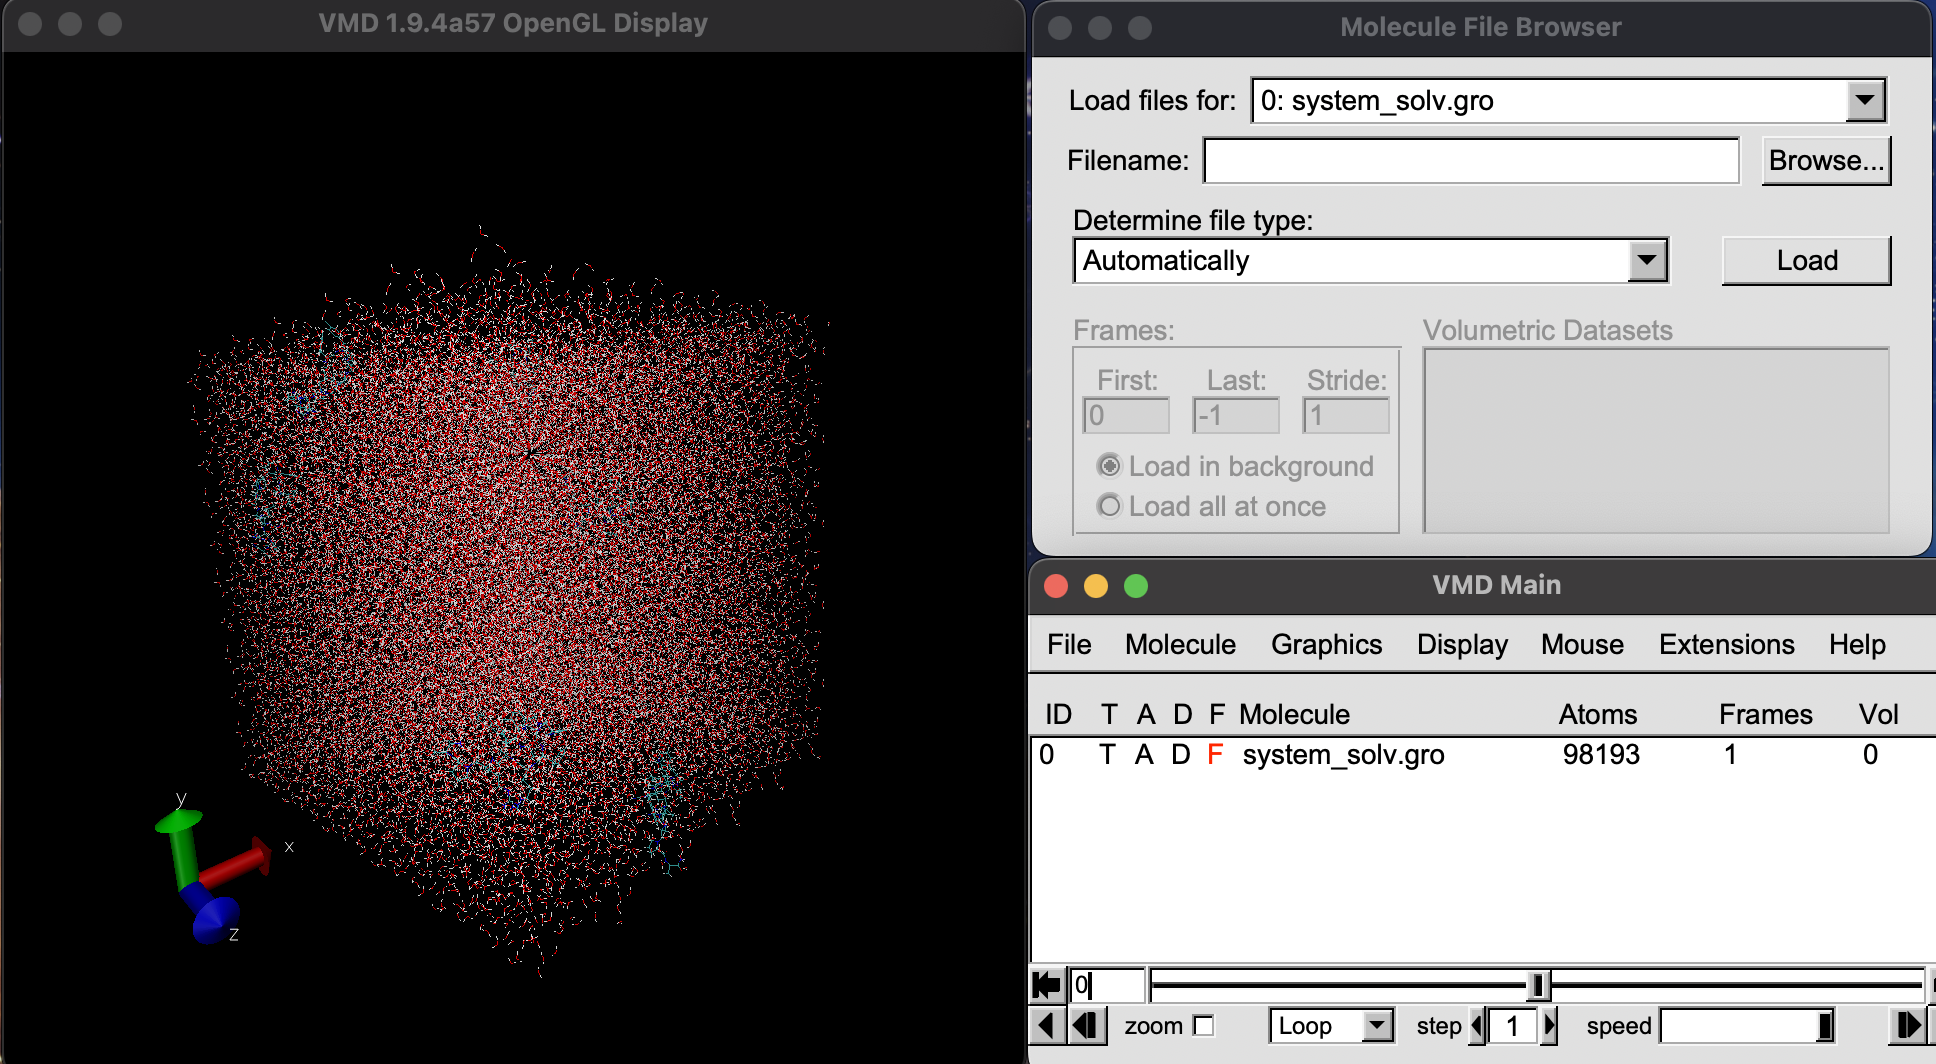

Once the file system_solv is created, you will need to add ions to the system to make the system neutral. The molecule Cetrorelix contains a total charge of +1. So, the total charge of the system is now +6 (since we added 6 cetrorelix molecules). We will now add 6 Chlorine ions each having a charge of -1.

Use the following command to create a topology parser file (ions.tpr) that contains all the force field information and coordinates to add the six Chloride ions

***!gmx grompp -f em.mdp -c system_solv.gro -r system_solv.gro -p cetrorelix_simulation.top -o ions.tpr -maxwarn 1 ***

- -f em.mdp is the input parameter file to be used for minimization later.
- -c system_solv.gro is the solvated system
- -r system_solv.gro is the reference structure that contains the molecule positions.
- -p cetrorelix_simulation.top is the topology file with the system description.
- -o ions.tpr is the output file that will later be used by the module 'genion'.
- -maxwarn 1 is the command to manage the warnings

In [22]:
# Creating the topology parser file: ions.tpr
!gmx grompp -f em.mdp -c system_solv.gro -r system_solv.gro -p cetrorelix_simulation.top -o ions.tpr -maxwarn 1

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [23]:
# Looking the generated files
!ls

 cetrorelix_simulation.top	  charmm36-nov2018.ff   md.mdp	    posre.itp
'#cetrorelix_simulation.top.1#'   CL.gro	        mdout.mdp   system.gro
 cetrorelix_single_molecule.gro   em.mdp	        npt.mdp     system.pdb
 cetrorelix_single_molecule.pdb   ions.tpr	        nvt.mdp     system_solv.gro


Then, use the following command to add six chloride ions and neutralize the system.

***!echo "SOL" | gmx genion -s ions.tpr -o system_solv_ion.gro -p cetrorelix_simulation.top -pname NA -nname CL -neutral***

- echo "SOL" is the command to select the group of solvent molecules that will be replaced with the chloride ions.
- gmx genion is the GROMACS module to add the chloride ions.
- -s ions.tpr is the input topology parser file that contains forcefield information.
- -o system_solv_ion.gro is the output file.
-	-p cetrorelix_simulation.top is the topology file that will be updated with the six chloride ions.
- -pname NA is the name of the positive ion (Na+) that might be used to neutralize the system.
-  -pname CL is the name of the negative ion (Cl-) that might be used to neutralize the system.
- -neutral is the command that confirms the ion addition until the system becomes electrically neutral.

In [24]:
# Adding ions automatically to neutralize
!echo "SOL" | gmx genion -s ions.tpr -o system_solv_ion.gro -p cetrorelix_simulation.top -pname NA -nname CL -neutral

              :-) GROMACS - gmx genion, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [25]:
# Looking the generated files
!ls

 cetrorelix_simulation.top	  charmm36-nov2018.ff   mdout.mdp    system.pdb
'#cetrorelix_simulation.top.1#'   CL.gro	        npt.mdp      system_solv.gro
'#cetrorelix_simulation.top.2#'   em.mdp	        nvt.mdp      system_solv_ion.gro
 cetrorelix_single_molecule.gro   ions.tpr	        posre.itp
 cetrorelix_single_molecule.pdb   md.mdp	        system.gro


In [26]:
# Downloading the system_solv_ion.gro
from google.colab import files
files.download('system_solv_ion.gro')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Use VMD to open the file system_solv_ion.gro to visualize the neutralized system.

- Click the Browse box to look for the ***system_solv_ion.gro***  file (mostly saved in the Downloads folder)
- Once the file is located, select it with the mouse, click the 'OK' box, and then click the 'Load' box.
- Select the menu Grapichs/Representations in the window called 'VMD main'. This will open a new window called 'Graphical Representations'.


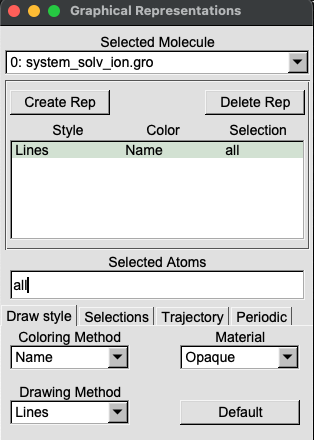

- Press the box 'Create Rep', and a new row will appear under the Style-Color-Selection box

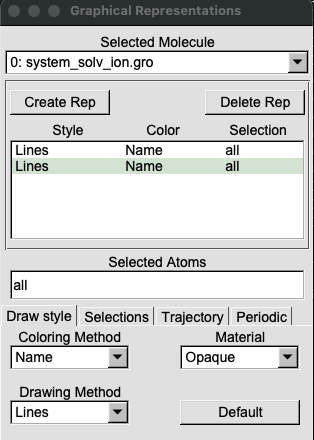

- Erase the word 'all' in the 'Selected Atoms' box, write 'protein', and click the box "Apply'.
- Change the Drawing Method from 'Lines' to 'VDW', and click the box Apply.

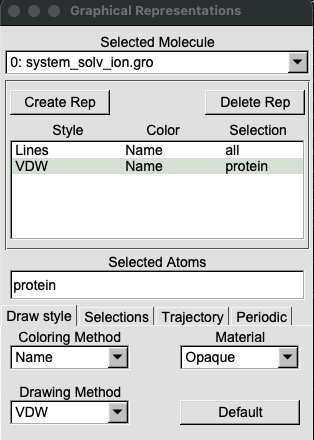

- Press the box 'Create Rep', and a new row will appear under the Style-Color-Selection box.
- Erase the word 'all' in the 'Selected Atoms' box, write **'resname CL'**, and click the box "Apply'.
Change the Drawing Method from 'Lines' to 'VDW', and click the box Apply

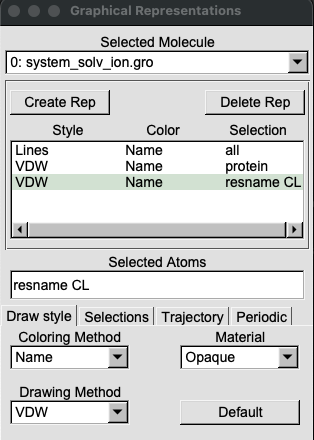

- Rotate the simulation box using the mouse to inspect it from different angles.
- Visualize the six spherical green ions in the simulation box

The expected output will be:

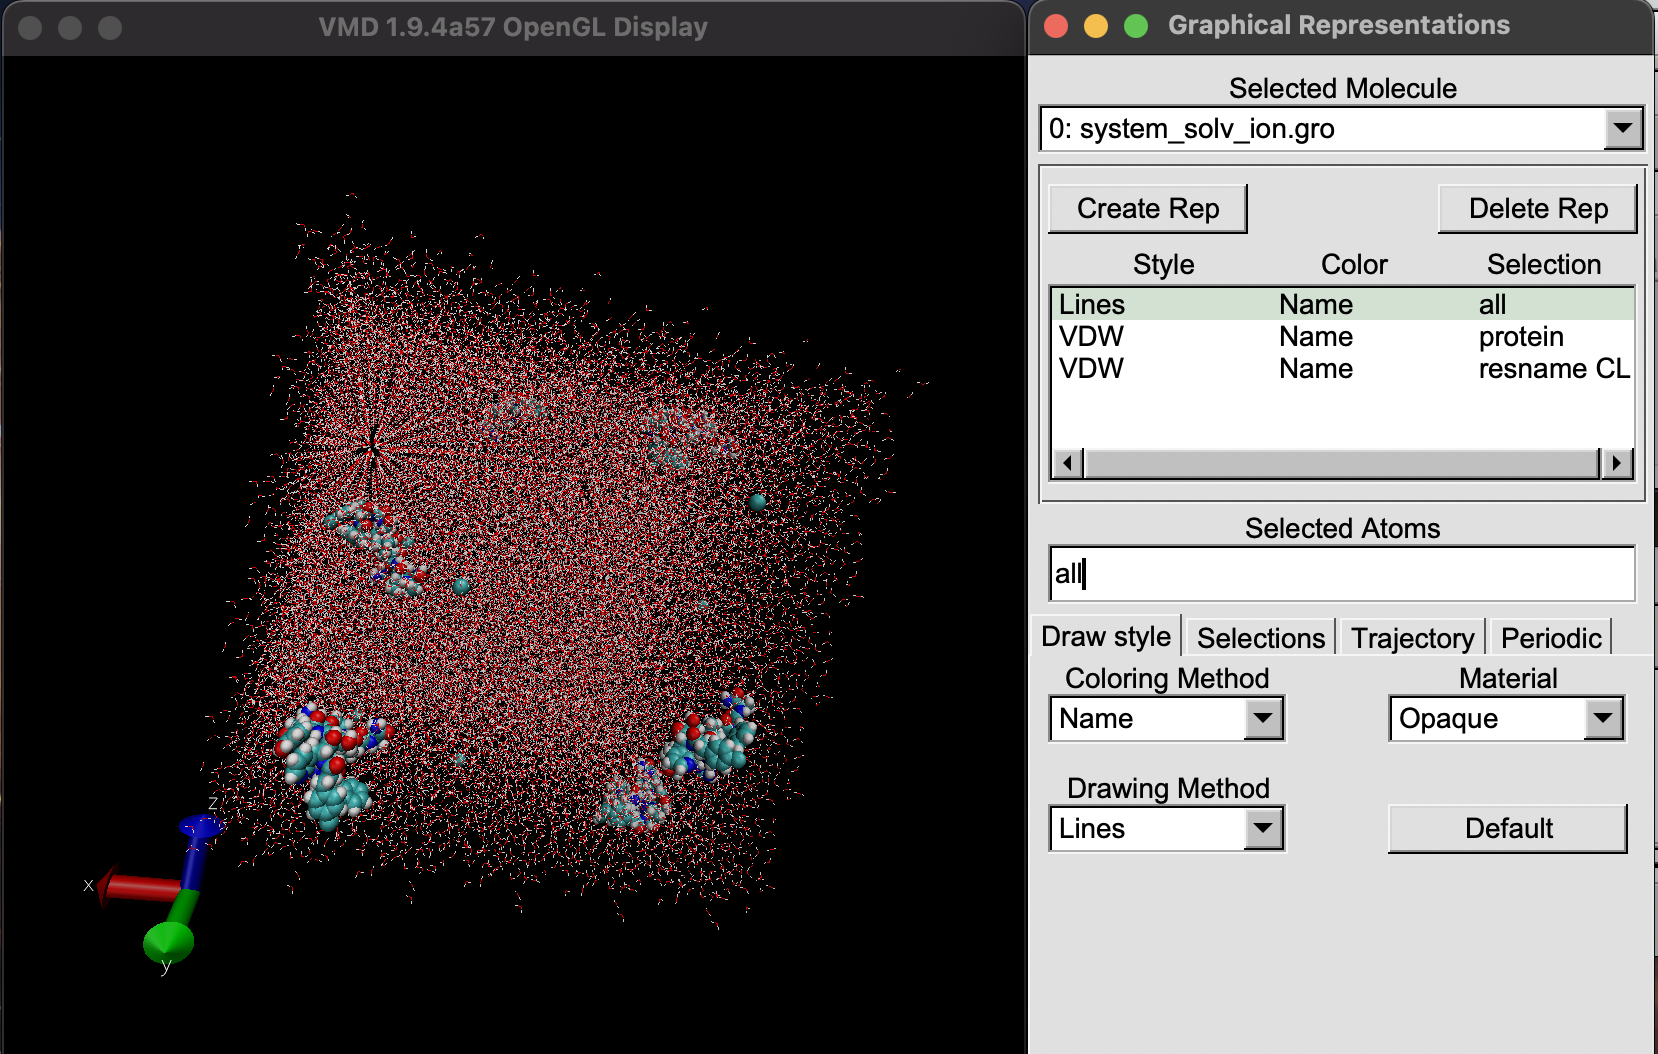

# 5. Energy minimization

Following construction of the initial system we need to go though the processes of energy minimization and equilibration, in two separate steps.

For energy minimization and equilibration, in addition to the system coordinates and topology we also need a third file, with details about what we want to do and how it should be done. These files end with .mdp. Before proceeding, open one of these files and look at its contents

In [27]:
2# Looking at the generated files
!ls

 cetrorelix_simulation.top	  charmm36-nov2018.ff   mdout.mdp    system.pdb
'#cetrorelix_simulation.top.1#'   CL.gro	        npt.mdp      system_solv.gro
'#cetrorelix_simulation.top.2#'   em.mdp	        nvt.mdp      system_solv_ion.gro
 cetrorelix_single_molecule.gro   ions.tpr	        posre.itp
 cetrorelix_single_molecule.pdb   md.mdp	        system.gro


In [28]:
# looking at the em.mdp file (nsteps has been changed to 2000 )
with open('em.mdp', 'r') as file:
    for i in range(100):
        print(file.readline(), end='')

title                    = CHARMM36
integrator               = steep
dt                       = 0.01  
nsteps                   = 2000
nstcomm                  = 100
comm-grps		  = 
nstxout                  = 0
nstvout                  = 0
nstfout                  = 0
nstlog                   = 1000
nstenergy                = 100
nstxout-compressed       = 1000
compressed-x-precision   = 100
compressed-x-grps        = 


cutoff-scheme            =   Verlet
nstlist                  = 1
ns_type                  = grid
pbc                      = xyz
rlist                    = 1.2
coulombtype              = PME
rcoulomb                 = 1.2
vdw-modifier            = Force-switch
rvdw_switch             = 1.0
rvdw                    = 1.2
dispcorr                 = no

tcoupl                   = v-rescale 
tc-grps                  = System 
tau_t                    = 1.0 
ref_t                    = 300 
Pcoupl                   = parrinello-rahman 
Pcoupltype               = isotropic
tau_

# Question:

Q1.- Explain the meaning of the folowing variables in the em.mdp file:

- nsteps
- rvdw
- rcoulomb

We start with energy minimization by using the following command:

***!gmx grompp -f em.mdp -c system_solv_ion.gro -r system_solv_ion.gro -p cetrorelix_simulation.top -o em.tpr***



- gmx grompp is the GROMACS command that compile the simulation input files (parameters, structure, reference positions, topology)  and will create an em.tpr file that will be used to run the energy minimization in the next step.

- -f em.mdp is the parameter file that contains the details of the minimization procedure.

- -c system_solv_ion.gro is the structure file that contains information about the solvated and neutralized system.

- -r system_solv_ion.gro is the reference structure file for applying position restraints.

- -p cetrorelix_simulation.top is the topology file that describes the force field parameters, molecule types, and quantities.

- -o em.tpr is the topology parser output file to be used in the next step.



In [29]:
# Generating the em.tpr file needed to perform the energy minimization
!gmx grompp -f em.mdp -c system_solv_ion.gro -r system_solv_ion.gro -p cetrorelix_simulation.top -o em.tpr

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [30]:
# Looking at the generated files
!ls

 cetrorelix_simulation.top	  charmm36-nov2018.ff   md.mdp	    system.gro
'#cetrorelix_simulation.top.1#'   CL.gro	        mdout.mdp   system.pdb
'#cetrorelix_simulation.top.2#'   em.mdp	        npt.mdp     system_solv.gro
 cetrorelix_single_molecule.gro   em.tpr	        nvt.mdp     system_solv_ion.gro
 cetrorelix_single_molecule.pdb   ions.tpr	        posre.itp


The following command will actually run the energy minimization simulation. This step will take a while. If everything went ok, you should see a lot of output on the screen followed by a section at the end with some summary statistics about the run.

In [31]:
import time

start_time = time.time()

# Run the GROMACS energy minimization
!gmx mdrun -v -deffnm em

end_time = time.time()
elapsed_time = end_time - start_time

print(f"\nEnergy minimization completed in {elapsed_time:.2f} seconds.")

              :-) GROMACS - gmx mdrun, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            T

This will also generate a number of files with the information about the energy minimization simulation.

In [32]:
# Looking at the generated files
!ls

 cetrorelix_simulation.top	  charmm36-nov2018.ff   em.mdp	   mdout.mdp    system.pdb
'#cetrorelix_simulation.top.1#'   CL.gro	        em.tpr	   npt.mdp      system_solv.gro
'#cetrorelix_simulation.top.2#'   em.edr	        em.trr	   nvt.mdp      system_solv_ion.gro
 cetrorelix_single_molecule.gro   em.gro	        ions.tpr   posre.itp
 cetrorelix_single_molecule.pdb   em.log	        md.mdp	   system.gro


The following command will allow you to prompt a number that corresponds to the potential energy. At the prompt, type '12 0' to select Potential (12); and zero (0) terminates input. This will generate a file named as 'potential.xvg'.

Use the following command:

***!gmx energy -f em.edr -o potential.xvg***

In [33]:
# Obtaining the energy minimization profile
!gmx energy -f em.edr -o potential.xvg

              :-) GROMACS - gmx energy, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

Make a plot of the potential energy vs time and include in your report.

# Questions:

Q2.- Does the potential energy seem to reach a stationary value?

Q3.- What is the purpose of energy minimization as part of setting up a molecular dynamics simulation?

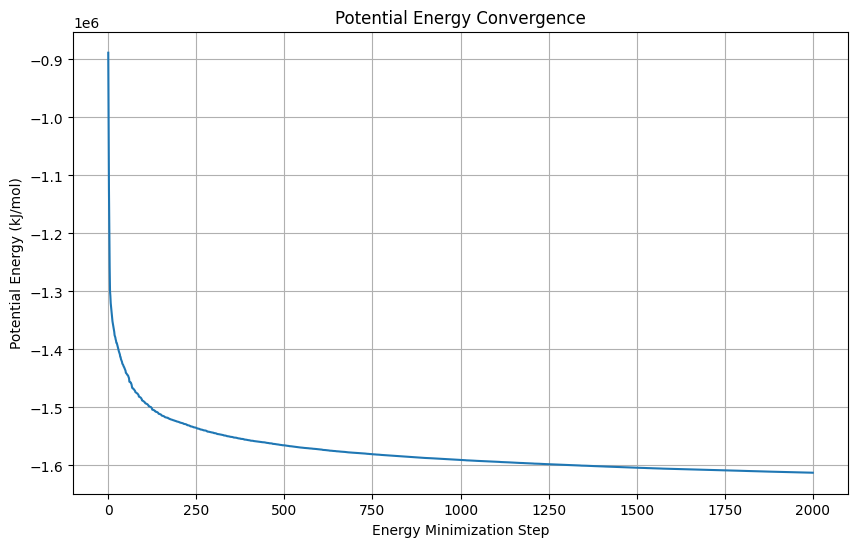

In [34]:
# Visualizing the potential.xvg file
import matplotlib.pyplot as plt
import numpy as np
filename= 'potential.xvg'

# Function to read xvg files
def read_xvg(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            if line.strip() and not line.startswith(('#', '@')):
                data.append([float(x) for x in line.split()])
    return np.array(data)

# Load your potential energy file
data = read_xvg('potential.xvg')
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data[:,0], data[:,1], '-')
plt.xlabel('Energy Minimization Step')
plt.ylabel('Potential Energy (kJ/mol)')
plt.title('Potential Energy Convergence')
plt.grid(True)
plt.show()

# 6. Equilibration

Following energy minimization we proceed to equilibration. The purpose of this step is to make sure that other important variables such as system temperature, density and pressure have reached their intended values and appear stable. This is done in two steps. The first phase is conducted under an NVT ensemble (constant Number of particles, Volume, and Temperature) and using the following commands which are similar to the energy minimization steps:

Use the following comand:

***!gmx grompp -f nvt.mdp -c em.gro -r em.gro -p cetrorelix_simulation.top -o nvt.tpr***

In [35]:
# Confirming that system temperature, density, and pressure have reached their intended values and appear stable
!gmx grompp -f nvt.mdp -c em.gro -r em.gro -p cetrorelix_simulation.top -o nvt.tpr

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

This will generate a 'nvt.tpr' file Then, using that 'nvt.tpr' file, we start the actual equilibration simulation by running the command

Use the following command:

***!gmx mdrun -v -s nvt.tpr -deffnm nvt***

In [36]:
# start equilibration with the generated 'nvt.tpr' file
# nsteps has been changed to 5000 = 10 ps
import time
start_time = time.time()

!gmx mdrun -v -s nvt.tpr -deffnm nvt

end_time = time.time()
elapsed_time = end_time - start_time

print(f"\nEquilibration completed in {elapsed_time:.2f} seconds.")

              :-) GROMACS - gmx mdrun, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            T

Once the NVT equilibration is done, we can obtain the temperature profile y running the following command:

***!gmx energy -f nvt.edr -o temperature.xvg***

Like the potential energy, this will prompt you to type a number corresponding to temperature. Find the number and type as previous. This will then generate a file named 'temperature.xvg'.


In [37]:
# Obtaining the temperature profile: temperature.xvg

!gmx energy -f nvt.edr -o temperature.xvg

              :-) GROMACS - gmx energy, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

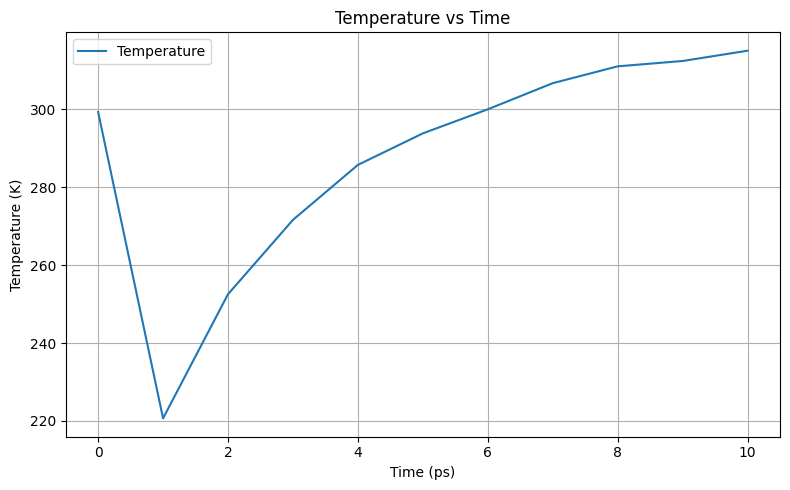

In [38]:
# Plot Temperature Vs Time
time = []
temperature = []

# Read the .xvg file
with open("temperature.xvg", "r") as f:
    for line in f:
        # Skip comments and metadata lines
        if line.startswith(("#", "@")):
            continue
        # Extract data columns
        parts = line.strip().split()
        if len(parts) >= 2:
            time.append(float(parts[0]))         # Time (ps)
            temperature.append(float(parts[1]))  # Temperature (K)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(time, temperature, label="Temperature", linewidth=1.5)
plt.xlabel("Time (ps)")
plt.ylabel("Temperature (K)")
plt.title("Temperature vs Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

the pressure and density profiles can be obtained by running the following commands

In [39]:
!ls

 cetrorelix_simulation.top	  em.edr     md.mdp	 nvt.mdp	 system.pdb
'#cetrorelix_simulation.top.1#'   em.gro     mdout.mdp	 nvt_prev.cpt	 system_solv.gro
'#cetrorelix_simulation.top.2#'   em.log     npt.mdp	 nvt.tpr	 system_solv_ion.gro
 cetrorelix_single_molecule.gro   em.mdp     nvt.cpt	 nvt.trr	 temperature.xvg
 cetrorelix_single_molecule.pdb   em.tpr     nvt.edr	 posre.itp
 charmm36-nov2018.ff		  em.trr     nvt.gro	 potential.xvg
 CL.gro				  ions.tpr   nvt.log	 system.gro


Then we perform the second step of the equilibration such as equilibration of pressure, which is conducted under an NPTensemble, wherein the Number of particles, Pressure, and Temperature are all constant. Use the following commands:

Use the following command:

***!gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -p cetrorelix_simulation.top -o npt.tpr***




In [40]:
!gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -p cetrorelix_simulation.top -o npt.tpr

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

Then, use the following command:

***!gmx mdrun -v -s npt.tpr -deffnm npt***

In [42]:
!gmx mdrun -v -s npt.tpr -deffnm npt

              :-) GROMACS - gmx mdrun, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            T

Once this simulation is done, the pressure and density profiles can be obtained by running the following commands:


***!gmx energy -f npt.edr -o pressure.xvg***

***!gmx energy -f npt.edr -o density.xvg***



In [43]:
# Obtaining the pressure profile
!gmx energy -f npt.edr -o pressure.xvg


              :-) GROMACS - gmx energy, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [44]:
# Looking at the generated files
!ls

 cetrorelix_simulation.top	  em.log     '#npt.edr.1#'  '#npt.trr.1#'   posre.itp
'#cetrorelix_simulation.top.1#'   em.mdp      npt.gro	     nvt.cpt	    potential.xvg
'#cetrorelix_simulation.top.2#'   em.tpr     '#npt.gro.1#'   nvt.edr	    pressure.xvg
 cetrorelix_single_molecule.gro   em.trr      npt.log	     nvt.gro	    system.gro
 cetrorelix_single_molecule.pdb   ions.tpr   '#npt.log.1#'   nvt.log	    system.pdb
 charmm36-nov2018.ff		  md.mdp      npt.mdp	     nvt.mdp	    system_solv.gro
 CL.gro				  mdout.mdp   npt_prev.cpt   nvt_prev.cpt   system_solv_ion.gro
 em.edr				  npt.cpt     npt.tpr	     nvt.tpr	    temperature.xvg
 em.gro				  npt.edr     npt.trr	     nvt.trr


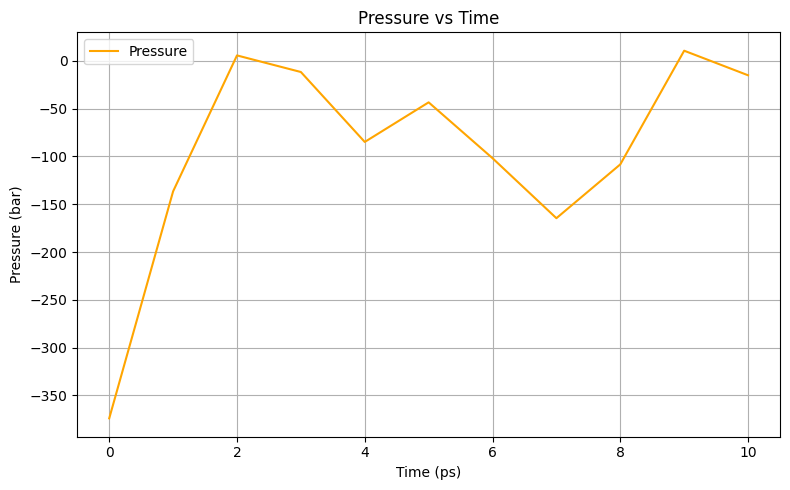

In [45]:
# Ploting Pressure vs Time
time = []
pressure = []

# Read the .xvg file
with open("pressure.xvg", "r") as f:
    for line in f:
        if line.startswith(("#", "@")):
            continue  # Skip comments and metadata
        parts = line.strip().split()
        if len(parts) >= 2:
            time.append(float(parts[0]))        # Time (ps)
            pressure.append(float(parts[1]))    # Pressure (bar)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(time, pressure, label="Pressure", color="orange", linewidth=1.5)
plt.xlabel("Time (ps)")
plt.ylabel("Pressure (bar)")
plt.title("Pressure vs Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
# Obtaining the density profile
!gmx energy -f npt.edr -o density.xvg

              :-) GROMACS - gmx energy, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

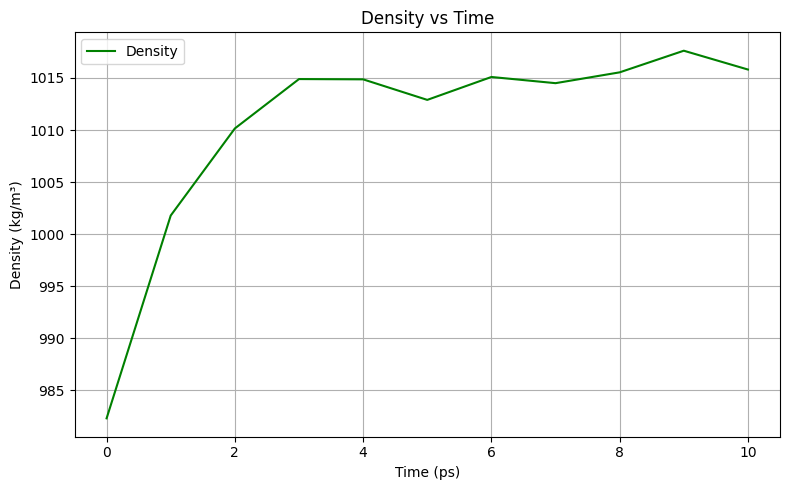

In [47]:
# Ploting Density vs Time
time = []
density = []

# Read the .xvg file
with open("density.xvg", "r") as f:
    for line in f:
        if line.startswith(("#", "@")):
            continue  # Skip metadata
        parts = line.strip().split()
        if len(parts) >= 2:
            time.append(float(parts[0]))       # Time (ps)
            density.append(float(parts[1]))    # Density (kg/m^3)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(time, density, label="Density", color="green", linewidth=1.5)
plt.xlabel("Time (ps)")
plt.ylabel("Density (kg/m³)")
plt.title("Density vs Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Once your equilibration is finished , similar to the plot of potential energy vs time, include in your report a plot of your choice of two of temperature, pressure, and density vs time.

After the equilibration simulation is done, we can start the final production simulation. To run the final production simulation, we will use 'md.mdp' file.

# Question

Q4. What would be the commands for setting up the final production run?

Hint: Follow the previous commands used in energy minimization or equilibration


As you might have noticed, this equilibration for 0.1 ns took almost 30 minutes time. To be able to do a few different analysis, we have provided ready-made trajectories of the same systems that are
 significantly longer than what we can realistically run during this exercise.

Download the trajectories files from:

[Analysis](https://uppsala.instructure.com/courses/64626/files/3151959?wrap=1)

Unzip the Analysis-2.zip file on your local computer and upload it to your Google Drive account.

The expected output will be a folder called Analysis inside the 'My Drive' folder



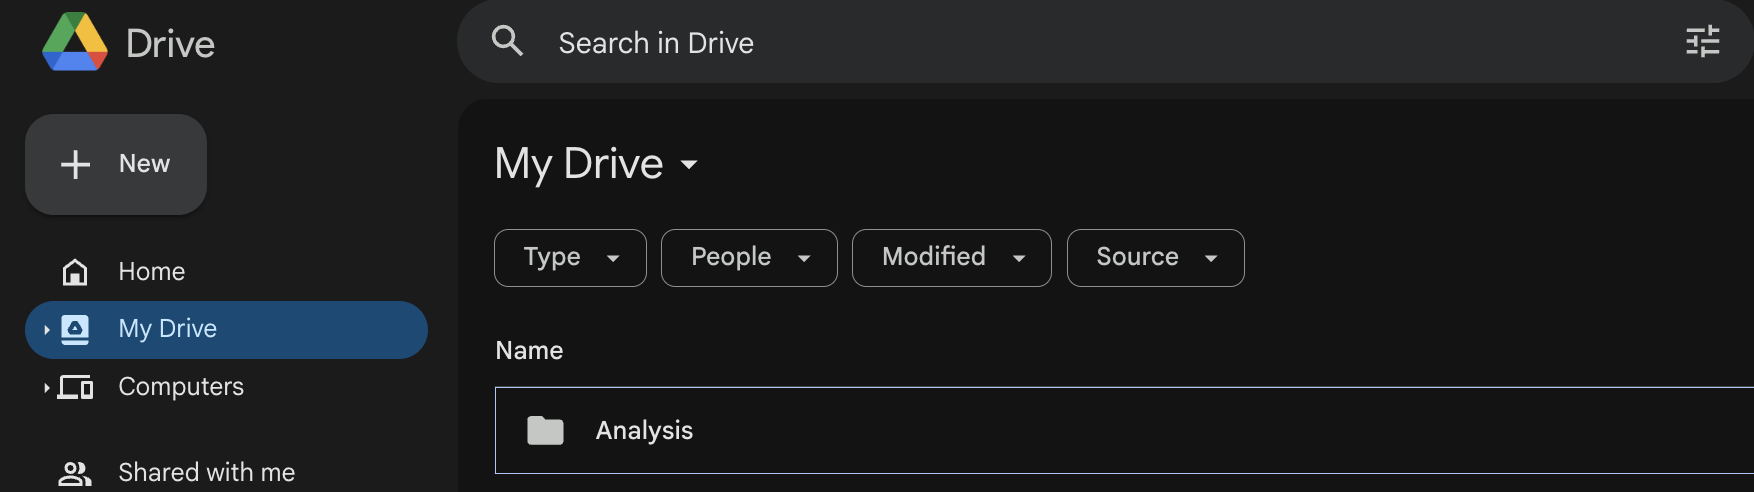

Connect your Google Drive account to this notebook by running the following code:

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
# Use this code if an error happend during mounting
#from google.colab import drive
#drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [67]:
# Changing the working directory to Cetrorelix
import os
os.chdir('/content/drive/MyDrive/Analysis/Hydrogen_bonding/Cetrorelix')
!pwd

/content/drive/MyDrive/Analysis/Hydrogen_bonding/Cetrorelix


In [68]:
# Looking at the uploaded files inside the Analysis/Hydrogen_bonding/Cetrorelix folder
!ls

index.ndx  initial.gro	last100ns_cetro.xtc  md.tpr


We will now be doing a few different analysis on these trajectories using ready-made scripts to automate the process to a degree at least.

# 7. Analysis
## 7.1 Hydrogen bonding

Inside the 'Hydrogen_bonding' folder you will find four different folder for four different peptides with each containing data for the last 100 ns of the simulation (400-500 ns). We will perform hydrogen binding analysis on this last 100 ns simulation trajectory. First navigate to the folder 'Cetrorelix'.

Then run the following command to obtain the protein-protein (peptide-peptide) hydrogen bonding

***!gmx hbond -f last100ns_cetro.xtc -s md.tpr -n index.ndx -num pro-pro.xvg***

This command will prompt you to type two groups for which you wish to calculate the hydrogen bonding. You first type 1 and then hit enter and again type 1 and hit enter. The number 1 here represent the proteins if you read carefully the screen. This will generate an output file pro-pro.xvg which contains the number of hydrogen bonds in each time steps in the second column. The first column in the time steps.

In [69]:
# obtaining the protein-protein (peptide-peptide) hydrogen bonding
!gmx hbond -f last100ns_cetro.xtc -s md.tpr -n index.ndx -num pro-pro.xvg

              :-) GROMACS - gmx hbond, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            T

Then you run the following command which will give you the average values of the peptide-peptide hydrogen bonds in the screen for this last 100 ns time for cetrorelix. Take note of this average value and their standard deviation.

***!gmx analyze -f pro-pro.xvg***

In [70]:
# obtaining the average values of the peptide-peptide hydrogen bonds
!gmx analyze -f pro-pro.xvg

             :-) GROMACS - gmx analyze, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

Then, we will calculate the peptide water hydrogen bonding. Run the following command:

***!gmx hbond -f last100ns_cetro.xtc -s md.tpr -n index.ndx -num pro-water.xvg***

Now when this command prompt you to type two groups, you type first 1 and then 12 in a similar fashion. Note that, 1 represents protein, and 12 represents water. This will generate a file named prowater.xvg which contains the peptide-water hydrogen bonds.

In [71]:
# obtaining the protein-water (peptide-water) hydrogen bonding
!gmx hbond -f last100ns_cetro.xtc -s md.tpr -n index.ndx -num pro-water.xvg

              :-) GROMACS - gmx hbond, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            T

Then run the following command to get the average value of peptide-water hydrogen bonds.

***!gmx analyze -f pro-water.xvg***

Take note of this average value and their standard deviation.

In [72]:
# obtaining the average values of the peptide-water hydrogen bonds
!gmx analyze -f pro-water.xvg

             :-) GROMACS - gmx analyze, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

Now, in a similar way, navigate to the other folders i.e. ozarelix, D-Phe-Gnrh, and calculate both the peptide-peptide and peptide-water hydrogen bonds. Then compare this values for each case and explain the results

In [73]:
# Changing the working directory to Ozarelix
import os
os.chdir('/content/drive/MyDrive/Analysis/Hydrogen_bonding/Ozarelix')
!pwd

/content/drive/MyDrive/Analysis/Hydrogen_bonding/Ozarelix


In [74]:
# Looking at the uploaded files inside the Analysis/Hydrogen_bonding/Ozarelix folder
!ls

index.ndx  initial.gro	last100ns_Ozarelix.xtc	md.tpr


In [75]:
# obtaining the protein-protein (peptide-peptide) hydrogen bonding
# Select (1) and then (1)
!gmx hbond -f last100ns_Ozarelix.xtc -s md.tpr -n index.ndx -num pro-pro.xvg

              :-) GROMACS - gmx hbond, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            T

In [76]:
# obtaining the average values of the peptide-peptide (protein-protein)hydrogen bonds
!gmx analyze -f pro-pro.xvg

             :-) GROMACS - gmx analyze, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [77]:
# obtaining the peptide-water (protein-water) hydrogen bonding
# Select (1) and then (12)
!gmx hbond -f last100ns_Ozarelix.xtc -s md.tpr -n index.ndx -num pro-water.xvg

              :-) GROMACS - gmx hbond, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            T

In [78]:
# obtaining the average values of the peptide-water (protein-water) hydrogen bonds
!gmx analyze -f pro-water.xvg

             :-) GROMACS - gmx analyze, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [79]:
# Changing the working directory to D-Phe_GnRH_uncharged_histidine
import os
os.chdir('/content/drive/MyDrive/Analysis/Hydrogen_bonding/D-Phe_GnRH_uncharged_histidine')
!pwd

/content/drive/MyDrive/Analysis/Hydrogen_bonding/D-Phe_GnRH_uncharged_histidine


In [80]:
# Looking at the uploaded files inside the Analysis/Hydrogen_bonding/D-Phe_GnRH_uncharged_histidine folder
!ls

index.ndx  initial.gro	last100ns_DPhe_uncharged.xtc  md.tpr


In [81]:
# obtaining the peptide-peptide (protein-protein) hydrogen bonding
# Select (1) and then (1)
!gmx hbond -f last100ns_DPhe_uncharged.xtc -s md.tpr -n index.ndx -num pro-pro.xvg

              :-) GROMACS - gmx hbond, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            T

In [82]:
# obtaining the average values of the peptide-peptide (protein-protein) hydrogen bonds
!gmx analyze -f pro-pro.xvg

             :-) GROMACS - gmx analyze, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [83]:
# obtaining the peptide-water (protein-water) hydrogen bonding
# Select (1) and then (12)
!gmx hbond -f last100ns_DPhe_uncharged.xtc -s md.tpr -n index.ndx -num pro-water.xvg

              :-) GROMACS - gmx hbond, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            T

In [84]:
# obtaining the average values of the peptide-water (protein-water) hydrogen bonds
!gmx analyze -f pro-water.xvg

             :-) GROMACS - gmx analyze, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [85]:
# Changing the working directory to D-Phe_GnRH_charged_histidine
import os
os.chdir('/content/drive/MyDrive/Analysis/Hydrogen_bonding/D-Phe_GnRH_charged_histidine')
!pwd

/content/drive/MyDrive/Analysis/Hydrogen_bonding/D-Phe_GnRH_charged_histidine


In [86]:
# Looking at the uploaded files inside the Analysis/Hydrogen_bonding/Ozarelix folder
!ls

index.ndx  initial.gro	last100ns_DPhe_charged.xtc  md.tpr


In [87]:
# obtaining the protein-protein (peptide-peptide) hydrogen bonding
# Select (1) and then (1)
!gmx hbond -f last100ns_DPhe_charged.xtc -s md.tpr -n index.ndx -num pro-pro.xvg

              :-) GROMACS - gmx hbond, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            T

In [88]:
# obtaining the average values of the peptide-peptide (protein-protein) hydrogen bonds
!gmx analyze -f pro-pro.xvg

             :-) GROMACS - gmx analyze, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [89]:
# obtaining the peptide-water (protein-water) hydrogen bonding
# Select (1) and then (12)
!gmx hbond -f last100ns_DPhe_charged.xtc -s md.tpr -n index.ndx -num pro-water.xvg

              :-) GROMACS - gmx hbond, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            T

In [90]:
# obtaining the average values of the peptide-water (protein-water) hydrogen bonds
!gmx analyze -f pro-water.xvg

             :-) GROMACS - gmx analyze, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

## 7.2 Contact map

Enter the folder 'Contact_map' and you will find four different folder for four different peptides. Each folder contains 2 python codes, initial structure (.pdb) file and complete trajectory file. Enter into one of the folder. To obtain the contact map, first run the following commands, which will take a few minutes

In [91]:
# Changing the working directory to Cetrorelix
import os
os.chdir('/content/drive/MyDrive/Analysis/Contact_map/Cetrorelix')
!pwd

/content/drive/MyDrive/Analysis/Contact_map/Cetrorelix


In [92]:
# Looking at the uploaded files inside the Analysis/Contact_map/Cetrorelix folder
!ls

oligos-cmap.py	plot-contact_map.py  protein_only.pdb  total_centered_clustered.xtc


In [93]:
# installing the necessary packages
!pip install MDAnalysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.1 MB/s eta 0:00:00


In [94]:
!pip install mdtraj

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.7 MB/s eta 0:00:00


In [ ]:
# Calculating the inter-contact map of protein chain residues
!python3 oligos-cmap.py protein_only.pdb total_centered_clustered.xtc 5

[DNAL2, D2003, DY334, SER5, TYR6, DCIR7, LEU8, ARG9, PRO10, DAL11]
/usr/local/lib/python3.11/dist-packages/MDAnalysis/coordinates/XDR.py:253: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn(


Once the output from this code is generated, run the following command to get the contact map:

***!python3 plot-contact_map.py contact-map.dat***

This code will provide a figure which shows the residue-residue contact map

In [ ]:
# Generating the contact-map
!python3 plot-contact_map.py contact-map.dat

In [ ]:
# Looking at the generated files inside the Analysis/Contact_map/Cetrorelix folder
!ls

In [ ]:
!apt-get install -y poppler-utils


In [ ]:
# Transform the pdf file into a png to be shown
!pdftoppm Contact_map.pdf Contact_map -png

In [ ]:
from IPython.display import Image

# Show the PNG
Image('Contact_map-1.png')

In [ ]:
# Changing the working directory to Ozarelix
import os
os.chdir('/content/drive/MyDrive/Analysis/Contact_map/Ozarelix')
!pwd

In [ ]:
# Looking at the uploaded files inside the Analysis/Contact_map/Ozarelix folder
!ls

In [ ]:
# Calculating the inter-contact map of protein chain residues
!python3 oligos-cmap.py protein_only.pdb total_centered_clustered.xtc 5

In [ ]:
# Generating the contact-map
!python3 plot-contact_map.py contact-map.dat

In [ ]:
# Looking at the generated files inside the Analysis/Contact_map/Ozarelix folder
!ls

In [ ]:
# Transform the pdf file into a png to be shown
!pdftoppm Contact_map.pdf Contact_map -png

In [ ]:
from IPython.display import Image
# Show the PNG
Image('Contact_map-1.png')

In [ ]:
# Changing the working directory to D-Phe_GnRH_uncharged_histidine
import os
os.chdir('/content/drive/MyDrive/Analysis/Contact_map/D-Phe_GnRH_uncharged_histidine')
!pwd

In [ ]:
# Looking at the uploaded files inside the Analysis/Contact_map/D-Phe_GnRH_uncharged_histidine folder
!ls

In [ ]:
# Calculating the inter-contact map of protein chain residues
!python3 oligos-cmap.py protein_only.pdb total_centered_clustered.xtc 5

In [ ]:
# Generating the contact-map
!python3 plot-contact_map.py contact-map.dat

In [ ]:
# Looking at the generated files inside the Analysis/Contact_map/D-Phe_GnRH_uncharged_histidine folder
!ls

In [ ]:
# Transform the pdf file into a png to be shown
!pdftoppm Contact_map.pdf Contact_map -png

In [ ]:
# Showing the contact-map
from IPython.display import Image
# Show the PNG
Image('Contact_map-1.png')

In [ ]:
# Changing the working directory to D-Phe_GnRH_uncharged_histidine
import os
os.chdir('/content/drive/MyDrive/Analysis/Contact_map/D-Phe_GnRH_charged_histidine')
!pwd

In [ ]:
# Looking at the uploaded files inside the Analysis/Contact_map/D-Phe_GnRH_charged_histidine folder
!ls

In [ ]:
# Calculating the inter-contact map of protein chain residues
!python3 oligos-cmap.py protein_only.pdb total_centered_clustered.xtc 5

In [ ]:
# Generating the contact-map
!python3 plot-contact_map.py contact-map.dat

In [ ]:
# Looking at the generated files inside the Analysis/Contact_map/D-Phe_GnRH_uncharged_histidine folder
!ls

In [ ]:
# Transform the pdf file into a png to be shown
!pdftoppm Contact_map.pdf Contact_map -png

In [ ]:
# Showing the contact-map
from IPython.display import Image
# Show the PNG
Image('Contact_map-1.png')


## 7.3 Binding and unbinding events

Similar to the hydrogen bonding and contact map, enter the folder 'Binding_Unbinding_events' and you will find four different folder for four different peptides. Each folder here also contains 2 python codes, initial structure (.gro) file and complete trajectory file. Enter one of the folder. To obtain the number of binding and unbinding events, first run the following command which will take about 10-15 minutes

***!python3 find_aggregates.py --top protein_only.gro --traj total_centered_clustered.xtc***

The screen will show that the calculation is ongoing with increasing time steps. This code will also generate four different output files.

1. Cluster_vs_time.txt:

In this file, the first column is time in picoseconds and the second column is the number of clusters.

2. molecules_in_clusters:

In this file, the first column is time in picoseconds, the second column is total number of molecules that belongs to an aggregate.

3. mols_vs_time.txt:

In this file, at each time step, the list of residues that belong to the cluster are provided.

size_of_clusters:

At each time step, list of all the clusters are mentioned in the second column


In [ ]:
# Installing necessary packages
!pip3 install python-gflags

In [ ]:
# Changing the working directory to Binding_Unbinding_events/Cetrorelix
import os
os.chdir('/content/drive/MyDrive/Analysis/Binding_Unbinding_events/Cetrorelix')
!pwd

In [ ]:
# Looking at the uploaded files inside the Analysis/Binding_Unbinding_events/Cetrorelix folder
!ls

In [ ]:
# Calculating the number of binding and unbinding events
!python3 find_aggregates.py --top protein_only.gro --traj total_centered_clustered.xtc

Using one of the output files 'mols_vs_time.txt', the code- 'Bind_unbind.py' will then calculate the number of binding and unbinding events. Run the following commands to get those values:

***!python3 Bind_unbind.py***

The screen will show you the outputs, i.e. the number of binding events and the number of unbinding events. Take note of these values and save them

In [ ]:
# Calculating the number of binding and unbinding events as a summary
!python3 Bind_unbind.py


In [ ]:
# Changing the working directory to Binding_Unbinding_events/Ozarelix
import os
os.chdir('/content/drive/MyDrive/Analysis/Binding_Unbinding_events/Ozarelix')
!pwd

In [ ]:
# Looking at the uploaded files inside the Analysis/Binding_Unbinding_events/Ozarelix folder
!ls

In [ ]:
# Calculating the number of binding and unbinding events
!python3 find_aggregates.py --top protein_only.gro --traj total_centered_clustered.xtc

In [ ]:
# Calculating the number of binding and unbinding events as a summary
!python3 Bind_unbind.py

In [ ]:
# Changing the working directory to Binding_Unbinding_events/D-Phe_GnRH_uncharged_histidine
import os
os.chdir('/content/drive/MyDrive/Analysis/Binding_Unbinding_events/D-Phe_GnRH_uncharged_histidine')
!pwd

In [ ]:
# Looking at the uploaded files inside the Analysis/Binding_Unbinding_events/D-Phe_GnRH_uncharged_histidine folder
!ls

In [ ]:
# Calculating the number of binding and unbinding events
!python3 find_aggregates.py --top protein_only.gro --traj total_centered_clustered.xtc

In [ ]:
# Calculating the number of binding and unbinding events as a summary
!python3 Bind_unbind.py

In [ ]:
# Changing the working directory to Binding_Unbinding_events/D-Phe_GnRH_charged_histidine
import os
os.chdir('/content/drive/MyDrive/Analysis/Binding_Unbinding_events/D-Phe_GnRH_charged_histidine')
!pwd

In [ ]:
# Looking at the uploaded files inside the Analysis/Binding_Unbinding_events/D-Phe_GnRH_charged_histidine folder
!ls

In [ ]:
# Calculating the number of binding and unbinding events
!python3 find_aggregates.py --top protein_only.gro --traj total_centered_clustered.xtc

In [ ]:
# Calculating the number of binding and unbinding events as a summary
!python3 Bind_unbind.py

To be included in the report:

* Using VMD, include a snapshot of your system after equilibration in the report, with the peptide backbone atoms colored blue and the sidechains green. Water can either be omitted completely, or visualized as some surface representation if you want to.

* Make a similar plot from the provided trajectories for the same peptide and discuss what has happened over the simulation time in each case.

* From the analysis of binding and unbinding events, use the following equation to calculate the CAP (collision acceptance probability) for the four peptides:

CAP = (Number of binding events-Number of unbinding events) / Number of binding events

Additional questions to answer in the report:

1. One of the peptides, D‑Phe6 ‑GnRH, contains a histidine residue at position 2. At physiological pH what would be the protonation state of this residue, and what would the consequences for aggregation be?

2. Is the aggregation tendencies consistent with the results from your hydrogen-bond analysis?

3. What residues in your peptide are more hydrophobic, so that they can be expected to promote peptide-peptide aggregation? Is that consistent with the results from your contact-map analysis?